# 3. Multi-class Vnet on BV

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from dataset import *
from vnet import *
from training import *
from niiutility import show_image, show_batch_image

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 3.1 Setup Torch Global Variable, load memory map 

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader, sampler, SubsetRandomSampler
from torchvision import transforms, utils

import torch.nn.functional as F  # useful stateless functions
import torchvision.transforms as T

#------------------------------- GLOBAL VARIABLES -------------------------------------#

USE_GPU = True
BATCH_SIZE = 2
NUM_WORKERS = 6
NUM_TRAIN = 84
LEARNING_RATE = 1e-3

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
    print('using GPU for training')
else:
    device = torch.device('cpu')

using GPU for training


In [15]:
#-------------------------LOAD THE DATA SET-------------------------------------------#

data_index = np.arange(107)
data_index = np.delete(data_index, 46)
dataset_trans = niiMaskDataset(data_index, 
                         transform=transforms.Compose([
                             downSample(2),
                             RandomFilp(0.5),
                             RandomAffine(15, 5)
                         ])
                     )

#-------------------------CREATE DATA LOADER FOR TRAIN AND VAL------------------------#

data_size = len(dataset_trans)
train_loader = DataLoader(dataset_trans, batch_size=BATCH_SIZE, \
                    sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)),\
                    num_workers=NUM_WORKERS)
validation_loader = DataLoader(dataset_trans, batch_size=BATCH_SIZE,
                    sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN,data_size)),\
                    num_workers=NUM_WORKERS)

* Print first 4 batch of data

0 torch.Size([2, 1, 64, 96, 96]) torch.Size([2, 1, 64, 96, 96])


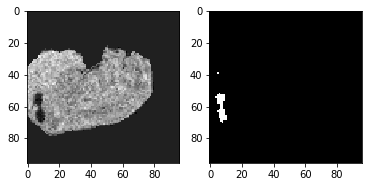

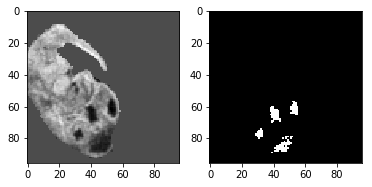

1 torch.Size([2, 1, 64, 96, 96]) torch.Size([2, 1, 64, 96, 96])


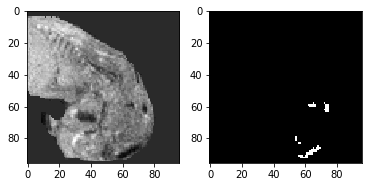

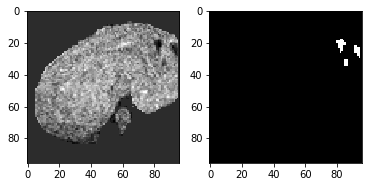

2 torch.Size([2, 1, 64, 96, 96]) torch.Size([2, 1, 64, 96, 96])


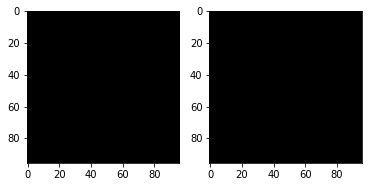

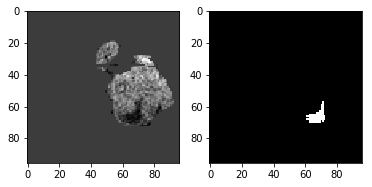

3 torch.Size([2, 1, 64, 96, 96]) torch.Size([2, 1, 64, 96, 96])


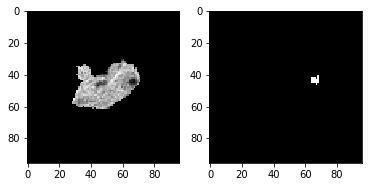

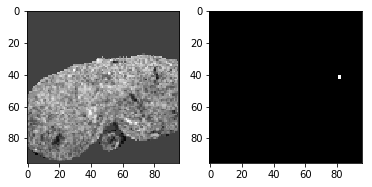

In [16]:
for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, sample_batched['image'].size(), \
          sample_batched['label'].size())
    show_batch_image(sample_batched['image'],sample_batched['label'],BATCH_SIZE, level=2)

    # observe 4th batch and stop.
    if i_batch == 3:
        break

In [17]:
from vnet import VNet
#-------------------------NEW MODEL INIT WEIGHT--------------------------------------#

model = VNet(classnum=1, slim=False)
model.apply(weights_init)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
#optimizer = optim.SGD (model.parameters(),lr=LEARNING_RATE, momentum=0.99)

In [18]:
from loss import *

train(model, train_loader, validation_loader, optimizer,\
      device=device, dtype=dtype, lossFun=dice_loss_single, epochs=1500, print_every=100)

epoch 0 begins: 
     Iteration 0, loss = 0.9933
     validation loss = 0.9761
epoch 1 begins: 
     Iteration 0, loss = 0.9722
     validation loss = 0.9699
epoch 2 begins: 
     Iteration 0, loss = 0.9510
     validation loss = 0.9679
epoch 3 begins: 
     Iteration 0, loss = 0.9610
     validation loss = 0.9424
epoch 4 begins: 
     Iteration 0, loss = 0.8915
     validation loss = 0.9075
epoch 5 begins: 
     Iteration 0, loss = 0.9224
     validation loss = 0.8939
epoch 6 begins: 
     Iteration 0, loss = 0.8100
     validation loss = 0.9253
epoch 7 begins: 
     Iteration 0, loss = 0.7183
     validation loss = 0.8472
epoch 8 begins: 
     Iteration 0, loss = 0.7812
     validation loss = 0.8585
epoch 9 begins: 
     Iteration 0, loss = 0.7704
     validation loss = 0.8361
epoch 10 begins: 
     Iteration 0, loss = 0.8918
     validation loss = 0.8293
epoch 11 begins: 
     Iteration 0, loss = 0.7486
     validation loss = 0.7885
epoch 12 begins: 
     Iteration 0, loss = 0.7520


epoch 101 begins: 
     Iteration 0, loss = 0.3624
     validation loss = 0.4540
epoch 102 begins: 
     Iteration 0, loss = 0.3108
     validation loss = 0.4894
epoch 103 begins: 
     Iteration 0, loss = 0.3446
     validation loss = 0.4916
epoch 104 begins: 
     Iteration 0, loss = 0.3228
     validation loss = 0.4714
epoch 105 begins: 
     Iteration 0, loss = 0.3778
     validation loss = 0.4869
epoch 106 begins: 
     Iteration 0, loss = 0.3537
     validation loss = 0.4723
epoch 107 begins: 
     Iteration 0, loss = 0.2812
     validation loss = 0.4702
epoch 108 begins: 
     Iteration 0, loss = 0.3788
     validation loss = 0.4855
epoch 109 begins: 
     Iteration 0, loss = 0.3017
     validation loss = 0.4854
epoch 110 begins: 
     Iteration 0, loss = 0.3500
     validation loss = 0.4792
epoch 111 begins: 
     Iteration 0, loss = 0.4117
     validation loss = 0.4530
epoch 112 begins: 
     Iteration 0, loss = 0.2955
     validation loss = 0.4591
epoch 113 begins: 
     Iter

     Iteration 0, loss = 0.4216
     validation loss = 0.4645
epoch 201 begins: 
     Iteration 0, loss = 0.3218
     validation loss = 0.4414
epoch 202 begins: 
     Iteration 0, loss = 0.3335
     validation loss = 0.4763
epoch 203 begins: 
     Iteration 0, loss = 0.5548
     validation loss = 0.4810
epoch 204 begins: 
     Iteration 0, loss = 0.4002
     validation loss = 0.4706
epoch 205 begins: 
     Iteration 0, loss = 0.3301
     validation loss = 0.4705
epoch 206 begins: 
     Iteration 0, loss = 0.4570
     validation loss = 0.4541
epoch 207 begins: 
     Iteration 0, loss = 0.2999
     validation loss = 0.4724
epoch 208 begins: 
     Iteration 0, loss = 0.3844
     validation loss = 0.4874
epoch 209 begins: 
     Iteration 0, loss = 0.3394
     validation loss = 0.4597
epoch 210 begins: 
     Iteration 0, loss = 0.3423
     validation loss = 0.4814
epoch 211 begins: 
     Iteration 0, loss = 0.3382
     validation loss = 0.4620
epoch 212 begins: 
     Iteration 0, loss = 0.4

     validation loss = 0.4573
epoch 302 begins: 
     Iteration 0, loss = 0.4312
     validation loss = 0.4692
epoch 303 begins: 
     Iteration 0, loss = 0.2913
     validation loss = 0.4745
epoch 304 begins: 
     Iteration 0, loss = 0.3680
     validation loss = 0.4595
epoch 305 begins: 
     Iteration 0, loss = 0.3349
     validation loss = 0.4796
epoch 306 begins: 
     Iteration 0, loss = 0.2890
     validation loss = 0.4606
epoch 307 begins: 
     Iteration 0, loss = 0.2951
     validation loss = 0.4564
epoch 308 begins: 
     Iteration 0, loss = 0.3763
     validation loss = 0.4611
epoch 309 begins: 
     Iteration 0, loss = 0.3318
     validation loss = 0.4703
epoch 310 begins: 
     Iteration 0, loss = 0.2804
     validation loss = 0.4619
epoch 311 begins: 
     Iteration 0, loss = 0.2976
     validation loss = 0.4499
epoch 312 begins: 
     Iteration 0, loss = 0.3937
     validation loss = 0.4670
epoch 313 begins: 
     Iteration 0, loss = 0.3239


KeyboardInterrupt: 

In [19]:
#-------------------------SAVE THE MODEL STATE DICT----------------------------------#
PATH = 'Vet_Mask_class_2'
torch.save(model.state_dict(), PATH)